### Devices Price Classification System using Python

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
sns.set_style("whitegrid")

## Load the dataset

In [2]:

# Load the dataset
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Exploratory Data Analysis (EDA)
# Add your insights and comments here

# Data Preprocessing

# Split the data into features and target
print('trian_shape:',train.shape)
print('test_shape',test.shape)

trian_shape: (2000, 21)
test_shape (1000, 21)


In [3]:
train.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Preparation of Training and Testing Data

In [4]:
# This line calculates the total number of null values in each column of the 'train' DataFrame
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
# Assigning the 'price_range' column to Y_train for target variable during training
Y_train = train['price_range']

# Creating X_train by dropping the 'price_range' column from the original 'train' DataFrame
# This leaves us with all other columns which will be used as features for training
X_train = train.drop('price_range', axis=1)

# Reassigning the 'price_range' column to Y_test for target variable during testing/validation
# Note: It seems there might be a mistake here since 'train' is used instead of a separate test dataset.
# Typically, you would split your data into training and testing sets beforehand.
Y_test = train['price_range']

# Attempting to create X_test by dropping the 'price_range' column from the 'train' DataFrame again
# As noted above, this should ideally be done using a separate test set to avoid data leakage.
X_test = train.drop('price_range', axis=1)

In [6]:
print('trian_shape:',X_train.shape)

trian_shape: (2000, 20)


## Preprocessing Data with Mean Imputatio

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initializing a SimpleImputer object with strategy set to 'mean'
# This means that missing values will be replaced with the mean of the available values in each feature/column
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Applying mean imputation to the training dataset
# fit_transform computes the mean for each feature and replaces NaN values with these computed means
X_train_imputed = mean_imputer.fit_transform(X_train)

# Reusing the same imputer instance to transform the test dataset
# Since the imputer was already fitted on the training data, it can now be applied to the test data
# This ensures consistency between the training and test sets after imputation
X_test_imputed = mean_imputer.transform(X_test)


### Normalizing Features with StandardScaler

In [8]:
# Initializing a StandardScaler object
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Applying normalization to the training dataset
# fit_transform calculates the mean and standard deviation for each feature and scales the data accordingly
X_train_normalize = scaler.fit_transform(X_train_imputed)

# Applying the same transformation to the test dataset
# This ensures that the test data is scaled in the same way as the training data
X_test_normalize = scaler.transform(X_test_imputed)

In [9]:
from sklearn.impute import SimpleImputer

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_normalize, Y_train, test_size = 0.3, random_state = 40)

In [10]:
train.drop_duplicates(inplace=True)

## Training and Evaluating Machine Learning Models

In [11]:
classifiers = {
    # Defining various classifiers with their default parameters
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(max_iter=1000),
}

def ml_model(models, X_train, X_test, y_train, y_test):
    # Initialize an empty dictionary to store model scores
    model_scores = {}
    
    # Loop through each classifier defined in the classifiers dictionary
    for name, model in classifiers.items():
        # Fit the model on the training data
        model.fit(X_train, y_train)
        
        # Evaluate the model on the test data and store the score
        model_scores[name] = model.score(X_test, y_test)
    
    # Return the dictionary of model scores
    return model_scores

### Evaluating Model Performance Across Multiple Classifiers

In [12]:
# Calling the ml_model function with the predefined classifiers and datasets
model_scores = ml_model(models=classifiers, 
                         X_train=x_train,
                        X_test=x_test,
                        y_train=y_train,
                        y_test=y_test)

# Displaying the model scores
print(model_scores)

{'KNN': 0.5, 'LR': 0.9533333333333334, 'DT': 0.8183333333333334, 'RF': 0.8683333333333333, 'SVM': 0.8683333333333333, 'MLP': 0.8966666666666666}


### Hyperparameter Tuning with Grid Search for Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initializing Logistic Regression with 'lbfgs' solver
lr = LogisticRegression(solver='lbfgs')  # Default solver is 'lbfgs'

# Defining the parameter grid for tuning
params = {
    "penalty": ["l2"],  # Only 'l2' is supported by 'lbfgs'
    "tol": [0.1, 0.01, 0.001, 0.0001,0.00001],  # Tolerance for stopping criteria
    "C": [50.0, 40.0, 30.0, 20.0, 10.0, 1.0, 0.1, 0.01]  # Inverse of regularization strength
}

# Setting up GridSearchCV for hyperparameter tuning
# cv=10 indicates that cross-validation is performed with 10 folds
clf = GridSearchCV(lr, params, cv=10)

# Fitting the model with the training data
clf.fit(x_train, y_train)

# Printing the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", clf.best_params_)


Best hyperparameters: {'C': 50.0, 'penalty': 'l2', 'tol': 0.0001}


### Evaluating Model Predictions on Training Data

Train Accuracy: 0.9914285714285714


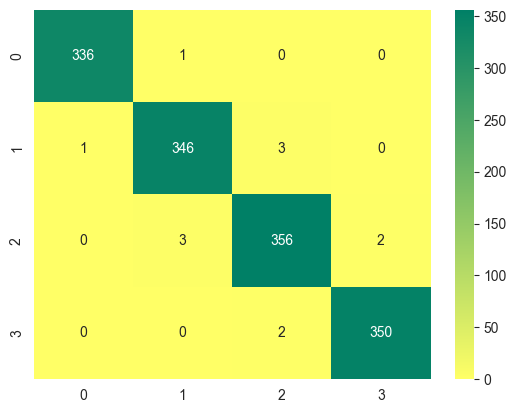

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Making predictions on the training data
y_pred = clf.predict(x_train)

# Calculating and printing the accuracy of the model on the training data
print(f"Train Accuracy: {accuracy_score(y_train, y_pred)}")

# Uncomment the following line to calculate and print the F1-score
#print(f"Train F1-Score: {f1_score(y_train, y_pred)}")

# Creating a heatmap of the confusion matrix to visualize the model's performance
sns.heatmap(confusion_matrix(y_train, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()

###  Generating a Classification Report

In [15]:
from sklearn.metrics import classification_report

# Generating a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       337
           1       0.99      0.99      0.99       350
           2       0.99      0.99      0.99       361
           3       0.99      0.99      0.99       352

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



### Evaluating Model Predictions on Test Data

Test Accuracy: 0.9815


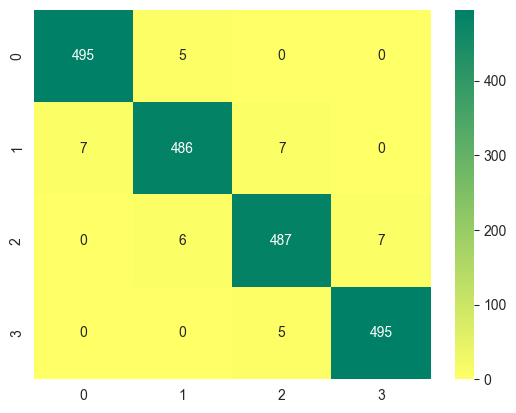

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Making predictions on the normalized test data
y_pred = clf.predict(X_test_normalize)

# Calculating and printing the accuracy of the model on the test data
print(f"Test Accuracy: {accuracy_score(Y_test, y_pred)}")

# Creating a heatmap of the confusion matrix to visualize the model's performance on the test data
sns.heatmap(confusion_matrix(Y_test, y_pred), fmt='.3g', annot=True, cmap='summer_r')
plt.show()


### Saving Trained Model and Scaler for Future Use

In [17]:
# Specifying filenames for the model and scaler
filename = 'finalized_model.pkl'
filename_scaler = 'scaler_model.pkl'

# Dumping the scaler object to file
pickle.dump(scaler, open(filename_scaler, 'wb'))

# Dumping the trained classifier to file
pickle.dump(clf, open(filename, 'wb'))


### Loading Saved Model and Scaler for Prediction

In [18]:
# Loading the trained classifier from file
loaded_model = pickle.load(open(filename, 'rb'))

# Loading the scaler object from file
loaded_scaler = pickle.load(open(filename_scaler, 'rb'))

### Making Predictions with Loaded Model and Scaler

In [19]:
# Assuming sample is a list representing a single data point
sample = [1021, 1, 0.5, 1, 0, 1, 53, 0.7, 136, 3, 6, 905, 1988, 2631, 17, 3, 7, 1, 1, 0]

# Transforming the sample using the loaded scaler
# This step ensures the sample is preprocessed in the same manner as the training data
sample_normalize = loaded_scaler.transform([sample])

# Making predictions on the transformed sample using the loaded model
predictions = loaded_model.predict(sample_normalize)

# predictions now contains the predicted class label for the sample


### predicted price for provided sample is

In [20]:
print(f"The predicted price is {predictions[0]}.")

The predicted price is 2.
